### 3.3.1 正态分布基础概念

In [1]:
import matplotlib.pyplot as plt  

In [2]:
import numpy as np

In [3]:
stock_cnt = 200
view_days = 504
stock_day_change = np.random.standard_normal((stock_cnt, view_days))

In [4]:
import scipy.stats as scs

股票0 mean均值期望：-0.026
股票0 std振幅标准差：0.985


C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


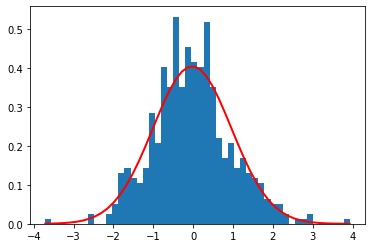

In [5]:
# 均值期望
stock_mean = stock_day_change[0].mean()
# 标准差
stock_std = stock_day_change[0].std()
print('股票0 mean均值期望：{:.3f}'.format(stock_mean))
print('股票0 std振幅标准差：{:.3f}'.format(stock_std))
# 绘制股票0的直方图
plt.hist(stock_day_change[0], bins=50, normed=True)
# linspace从股票0最小值->最大值生成数据
fit_linspace = np.linspace(stock_day_change[0].min(), stock_day_change[0].max())
# 概率密度函数（PDF, probability density function）
# 由均值、方差来描述曲线，使用scipy.stats.norm.pdf生成拟合曲线
pdf = scs.norm(stock_mean, stock_std).pdf(fit_linspace)
# plot x, y
plt.plot(fit_linspace, pdf, lw=2, c='r')

股票0 mean均值期望：-0.026
股票0 std振幅标准差：0.985


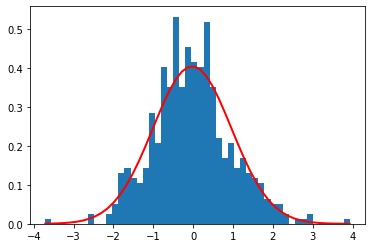

In [6]:
# 均值期望
stock_mean = stock_day_change[0].mean()
# 标准差
stock_std = stock_day_change[0].std()
print('股票0 mean均值期望：{:.3f}'.format(stock_mean))
print('股票0 std振幅标准差：{:.3f}'.format(stock_std))
# 绘制股票0的直方图
plt.hist(stock_day_change[0], bins=50, density=True)
# linspace从股票0最小值->最大值生成数据
fit_linspace = np.linspace(stock_day_change[0].min(), stock_day_change[0].max())
# 概率密度函数（PDF, probability density function）
# 由均值、方差来描述曲线，使用scipy.stats.norm.pdf生成拟合曲线
pdf = scs.norm(stock_mean, stock_std).pdf(fit_linspace)
# plot x, y
plt.plot(fit_linspace, pdf, lw=2, c='r')

In [7]:
pdf

array([3.68329541e-04, 6.57730050e-04, 1.14545824e-03, 1.94550022e-03,
       3.22258032e-03, 5.20591009e-03, 8.20181597e-03, 1.26021262e-02,
       1.88841773e-02, 2.75976920e-02, 3.93339807e-02, 5.46743318e-02,
       7.41172866e-02, 9.79886974e-02, 1.26343500e-01, 1.58873062e-01,
       1.94835493e-01, 2.33027045e-01, 2.71809747e-01, 3.09203335e-01,
       3.43039205e-01, 3.71162244e-01, 3.91655536e-01, 4.03055817e-01,
       4.04526114e-01, 3.95957320e-01, 3.77981579e-01, 3.51895197e-01,
       3.19504139e-01, 2.82917676e-01, 2.44322870e-01, 2.05773103e-01,
       1.69018225e-01, 1.35393841e-01, 1.05775413e-01, 8.05918258e-02,
       5.98849518e-02, 4.33975147e-02, 3.06713194e-02, 2.11407555e-02,
       1.42111425e-02, 9.31661028e-03, 5.95672169e-03, 3.71430134e-03,
       2.25874604e-03, 1.33960920e-03, 7.74835091e-04, 4.37079952e-04,
       2.40454516e-04, 1.29010611e-04])

### 3.3.2 实例1：正态分布买入策略

In [8]:
# 保留后50天的随机数据作为策略验证数据
keep_days = 50
# 统计前454天中的200只股票的涨跌数据，切片切出0-454day，view_days = 504
stock_day_change_test = stock_day_change[:stock_cnt, :view_days-keep_days]
# 打印出前454天中跌幅最大的3只股票，总跌幅通过np.sum()函数计算，np.sort()函数对结果排序
print(np.sort(np.sum(stock_day_change_test, axis=1))[:3])
# 使用np.argsort()函数针对股票跌幅进行排序，返回序号，即符合买入条件的股票序号
stock_lower_array = np.argsort(np.sum(stock_day_change_test, axis=1))[:3]
# 输出符合买入条件的股票序号
stock_lower_array

[-48.82335392 -47.1085811  -46.11337339]


array([140,  64, 127], dtype=int64)

In [9]:
def show_buy_lower(stock_ind):
    """
    :param stock_ind:股票序号，即在stock_day_change中的位置
    :return：
    """
    # 设置一个一行两列的可视化图表
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    # view_days 504-keep_days 50 = 454
    # 绘制前454天的股票走势图，np.cumsum():序列连续求和
    axs[0].plot(np.arange(0, view_days-keep_days), stock_day_change_test[stock_ind].cumsum())
    # [view_days504 - keep_days50 = 454: view_days504]
    # 从第454天开始到504天的股票走势
    cs_buy = stock_day_change[stock_ind][view_days-keep_days:view_days].cumsum()
    #绘制从第454天到504天中股票的走势图
    axs[1].plot(np.arange(view_days-keep_days, view_days), cs_buy)
    # 返回从第454天开始到504天计算盈亏的盈亏序列的最后一个值
    return cs_buy[-1]

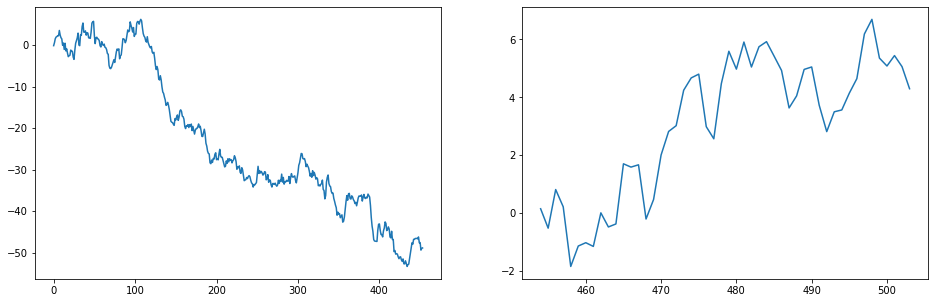

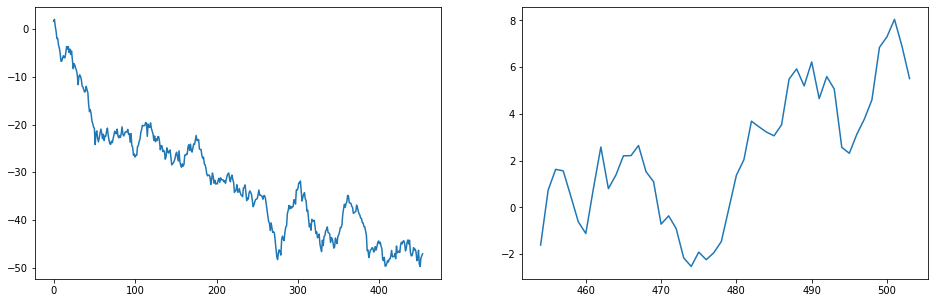

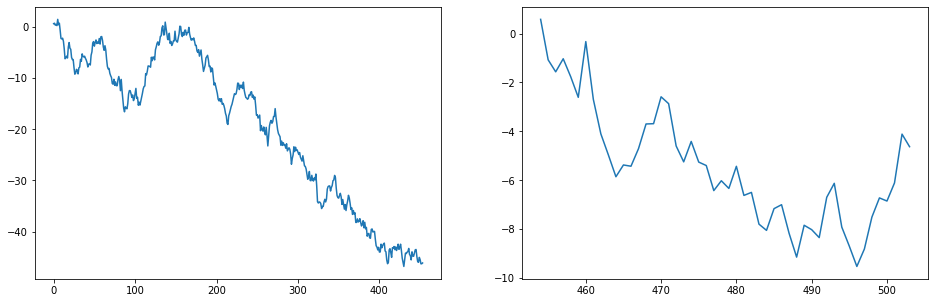

In [10]:
for stock_ind in stock_lower_array:
    show_buy_lower(stock_ind)

买入第140只股票，从第454个交易日开始持有盈亏：4.30%
买入第64只股票，从第454个交易日开始持有盈亏：9.81%
买入第127只股票，从第454个交易日开始持有盈亏：5.18%


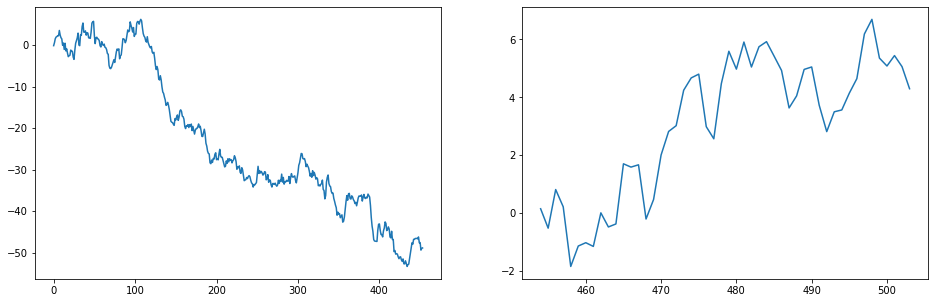

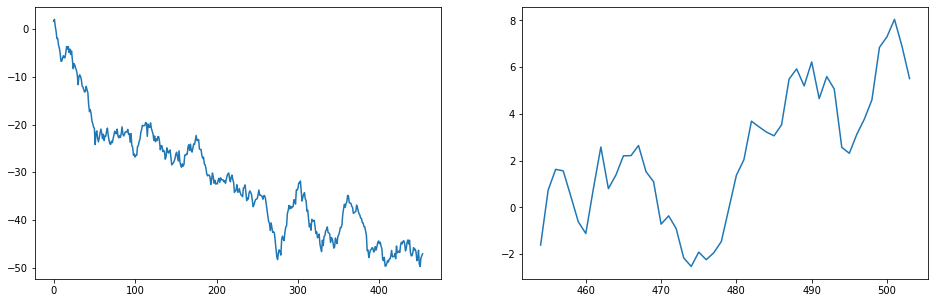

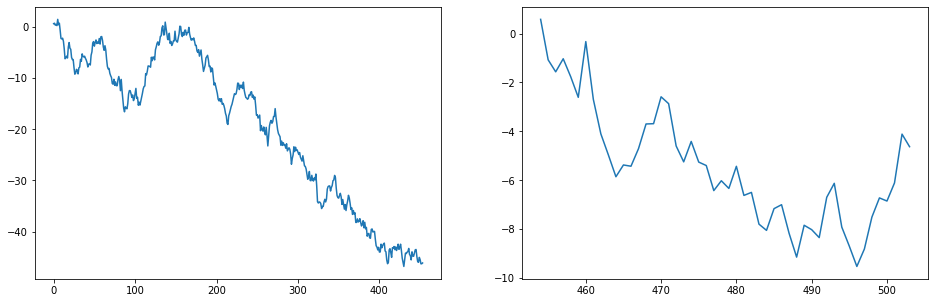

In [11]:
# 最后输出的盈亏比列
profit = 0
# 遍历跌幅最大的3只股票序号序列
for stock_ind in stock_lower_array:
    # profit即3只股票从第454天买入开始计算，直到最后一天的盈亏比例
    profit += show_buy_lower(stock_ind)
# str.format支持{:.2f}形式保留两位小数
    print('买入第{}只股票，从第454个交易日开始持有盈亏：{:.2f}%'.format(stock_ind, profit))